# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Genome-wide-epistasis:-A-definition" data-toc-modified-id="Genome-wide-epistasis:-A-definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Genome-wide epistasis: A definition</a></div><div class="lev1 toc-item"><a href="#Introduction-to-epistasis-plots" data-toc-modified-id="Introduction-to-epistasis-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction to epistasis plots</a></div><div class="lev2 toc-item"><a href="#Egl-9-is-epistatic-to-vhl-1" data-toc-modified-id="Egl-9-is-epistatic-to-vhl-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Egl-9 is epistatic to vhl-1</a></div><div class="lev1 toc-item"><a href="#Odds-ratios" data-toc-modified-id="Odds-ratios-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Odds ratios</a></div><div class="lev2 toc-item"><a href="#Writing-the-theoretical-models" data-toc-modified-id="Writing-the-theoretical-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Writing the theoretical models</a></div><div class="lev2 toc-item"><a href="#Writing-the-free-slope-model" data-toc-modified-id="Writing-the-free-slope-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Writing the free slope model</a></div><div class="lev2 toc-item"><a href="#Writing-the-Odds-Ratio-function" data-toc-modified-id="Writing-the-Odds-Ratio-function-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Writing the Odds Ratio function</a></div><div class="lev2 toc-item"><a href="#Odds-ratio-for-the-genome-wide-epistasis-measurements-between-egl-9-and-vhl-1" data-toc-modified-id="Odds-ratio-for-the-genome-wide-epistasis-measurements-between-egl-9-and-vhl-1-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Odds ratio for the genome-wide epistasis measurements between <em>egl-9</em> and <em>vhl-1</em></a></div><div class="lev1 toc-item"><a href="#Measuring-suppressive-epistasis" data-toc-modified-id="Measuring-suppressive-epistasis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Measuring suppressive epistasis</a></div><div class="lev2 toc-item"><a href="#hif-1-suppresses-egl-9" data-toc-modified-id="hif-1-suppresses-egl-9-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>hif-1 suppresses egl-9</a></div><div class="lev1 toc-item"><a href="#Transitivity-in-transcriptomes" data-toc-modified-id="Transitivity-in-transcriptomes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transitivity in transcriptomes</a></div><div class="lev2 toc-item"><a href="#Predicting-the-epistasis-between-egl-9-and-vhl-1-using-the-rhy-1-transcriptome" data-toc-modified-id="Predicting-the-epistasis-between-egl-9-and-vhl-1-using-the-rhy-1-transcriptome-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Predicting the epistasis between <em>egl-9</em> and <em>vhl-1</em> using the <em>rhy-1</em> transcriptome</a></div><div class="lev2 toc-item"><a href="#Predicting-the-epistasis-between-egl-9-and-hif-1-using-the-rhy-1-transcriptome" data-toc-modified-id="Predicting-the-epistasis-between-egl-9-and-hif-1-using-the-rhy-1-transcriptome-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Predicting the epistasis between <em>egl-9</em> and <em>hif-1</em> using the <em>rhy-1</em> transcriptome</a></div>

In this notebook, we develop the notion of 'genome-wide epistasis'. Genome-wide epistasis is a generalization of the methods used to measure epistasis between genotypes using qPCR. Why genome-wide epistasis can even begin to appear seems a bit mysterious, and we briefly touch on this philosophical aspect at the end of the notebook.

# Genome-wide epistasis: A definition

Epistasis is defined by Huang and Sternberg (2006) as one allele masking another allele's phenotype. In other words, if an allele $X$ has a phenotype $Ph_1$, and an allele $Y$ (at a different locus) has a different phenotype $Ph_2$, we can say that $X$ and $Y$ are epistatic if the double homozygote has a phenotype that is equal to either $Ph_1$ or $Ph_2$. Epistasis is also known as non-additivity, and it is the basis of the definition of genetic interactions. Of course, stating that two genes are epistatic to each other is subject to a large number of qualifiers. A particularly important qualifier is that the phenotypes under study must have a reasonable dynamic range&mdash;they must not be too strong or too subtle, or non-additivity could occur simply as a result of a compressed range. Another important consideration is that the alleles used to study a genetic interaction must be complete loss of function alleles for the phenotype under consideration. If they are not, trouble can arise from making inferences that are just too strong. 

The null hypothesis when observing two mutants of different genes is that they do not interact. Therefore, when the double mutant is made, the result must be that the two phenotypes add. We reasoned that, ideally, this should also be the case for vectorial phenotypes. This enabled us to make a prediction about what a double mutant would look like. Given two alleles $X$ and $Y$ that code for different genes (i.e. that complement), the double mutant $X^-Y^-$ should have expression levels equal to:

$$
\beta_{XY, Predicted~Additive ,i} = \beta_{X,i} + \beta_{Y,i},
$$

where $\beta_{G,i}$ is the regression coefficient (from Sleuth) for genotype $G$ and isoform $i$, and $\beta_{XY, Predicted~Additive, i}$ is the predicted expression of isoform $i$ in a double mutant of $X$ and $Y$ under an additive model.
Since we have data for double and single mutants, we reasoned that we should be able to plot the predicted expression, $\beta_{XY,Pred, i}$, against deviations from the predicted expression $\Delta_i = \beta_{XY,i} - \beta_{XY, Pred}$. Given these two numbers (the predicted additive effect and the deviation from predicted), we can generate an epistasis plot, where the X-axis reflects the predicted expression level of the double mutant assuming an additive model, and the Y-axis defines the deviation from predicted. 
For additive mutants, we expect to see that the genes fall along the line $\Delta_i = 0$ with some noise $\epsilon_i$. 

Having defined our null hypothesis, it is now possible to explore what other results could be expected. Suppose that $X$ and $Y$ act along a single, activating pathway of the form $X\rightarrow Y\rightarrow Ph$ or $Y\rightarrow X\rightarrow Ph$. In that case, both genes should:
1. Act on the same phenotype
2. Have the same magnitude of effect.

We can predict the additive effect of an additive interaction when both genes have the same effect on a phenotype, it should be $2\beta_{X,i} = 2\beta_{Y,i} = 2\beta_i$. We can also reason about what the phenotype of the mutant should be. If the two genes are acting along a single pathway, breaking the pathway twice should have the same effect as breaking it once. Therefore, it must be the case that $\beta_{XY, Pred,i} = \beta_i$. Next, we can calculate that the idealized deviation from the additive value should be $\Delta_i = \beta_i - 2\beta_i = -\beta_i$. Putting it all together, we then would expect the coordinates for each isoform to be:

$$
(2\beta_i, -\beta_i + \epsilon_i),
$$

which suggests that when two genes interact positively through a single unbranched pathway, an epistasis plot should show points that fall along the line $y=-0.5x$.

What about a model where $X --| Y$? For this case, I will invoke a limit argument. Suppose that, under "usual laboratory conditions" (whatever those are!), $X$ is `ON` and it is often present in large quantities in the cell. Suppose further, that $X$ is the strongest possible (non-competitive) inhibitor of $Y$. Then it follows that under usual conditions, $Y$ must be `OFF`. Therefore, a null mutant of $Y$ should look transcriptomically wild-type or very close to it. The predicted expression of a double mutant should therefore be $\beta_{X, i} + \beta_{Y, i} \sim \beta_{X,i}$. We can reason about the actual expression level of a double mutant as follows: If $X$ inhibits $Y$, then removing $X$ causes a large increase in the protein levels of $Y$. However, removing $Y$ from the $X^-$ animal means that protein levels of $Y$ return to wild-type. This is an effect known as suppression. Suppression means that the allele that is downstream of the inhibitor defines what the phenotype will be. Therefore, the expression phenotype of this double mutant, $\beta_{XY, i} = \beta_{Y,i}$.
With this number in hand, we can now calculate $\Delta_i = \beta_{Y,i} - \beta_{Y,i} - \beta_{X, i} = -\beta_{X,i}$. From this, it follows that the points will fall near the coordinates,
$$
(\beta_{X,i}, -\beta_{X,i}).
$$
In other words, the points will fall along the line $y=-x$.

At this point, we have covered most of the notable simple cases. Only two remain. Suppose that for two mutants under study, the double mutant expresses the phenotype of one of the single mutants. This means that $X^-Y^- = X^-$. What slope should we observe? Well, clearly we can predict the additive (x-axis) coordinate: $\beta_{X,i} + \beta_{Y,i}$. What about the deviation from additive? Well, if the double mutant looks like the mutant $X^-$, then it follows that the expression should also match. In other words, $\beta_{XY,i} = \beta_{X}$. From this, we can predict the coordinates of each point on the epistasis plot to be:

$$
(\beta_{X, i} + \beta_{Y, i}, -\beta_{Y, i}
$$

What does this mean? Well, if $\beta_{X,i}$ was completely uncorrelated from $\beta_{Y,i}$, we might be tempted to say that this should still fall along the line of $y=-x$, perhaps with  more noise than the case of suppression. However, this is not the case! $\beta_{X,i}$ and $\beta_{Y,i}$ are covariant! Well, nothing remains but to make a line of best fit. We can only say one thing about the line of best fit: It should have a slope $\alpha$ that is less than one! The closer this $\alpha$ is to -0.5, the closer the two genes are to interacting exclusively in a linear manner; the closer the slope is to $-1$, the closer these genes are to being in the limit of strong suppression. Anything in between? Well, the in-between is also interpretable.

How can we know that the points will fall on a straight line? Well. Let us consider a branched pathway, where $X\rightarrow Y \rightarrow Ph$, but $X\rightarrow Ph$ is also true (i.e., $X$ acts on $Ph$ in $Y$-dependent and independent manners). How do we know these will form a line? Well, suppose that the effect of $X$ on $Ph$ is complete. Then this means that $XY=X$. If $X$ interacts with $Ph$ in a simple manner (i.e., suppose $X$ activates a transcription factor that mediates $Ph$), then we can make the following statement: $Y$ accounts for a fraction $f$ of the interaction of $X$ on $Ph$.

Given the above statement is true, then it follows that
$$
\beta_{Y,i} = f\beta_{X,i}.
$$

We can now predict the additive effect of the double mutant:

$$
\beta_{XY, Add Pred, i} = (1+f)\beta_{X,i}.
$$

However, because we know that $XY=X$, we know that the expression of the double mutant will match the expression of $X$. Therefore, the expected deviation of the double mutant should be 

$$
\Delta_i = -f\beta_{X,i},
$$

and the data will fall along the coordinates $((1+f)\beta_{X,i}, -f\beta_{X,i})$. Therefore, the points will fall along the line:

$$
y = -\frac{f}{1+f}x
$$

Notice that $f$ can only range from [0, 1], which restricts the range of slopes from [0, -0.5]. 

Enough talking. Let's write some code. 

In [1]:
# important stuff:
import os
import pandas as pd
import numpy as np
import statsmodels.tools.numdiff as smnd
import scipy

# TEA and morgan
import morgan as morgan
import epistasis as epi
import gvars

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

from scipy.stats import gaussian_kde

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
q=0.1
genvar = gvars.genvars()

# Specify the genotypes to refer to:
single_mutants = ['b', 'c', 'd', 'e', 'g']
double_mutants = {'a' : 'bd', 'f':'bc'}

# initialize the morgan.hunt object:
thomas = morgan.hunt('target_id', 'b', 'tpm', 'qval')
thomas.add_genmap('../input/library_genotype_mapping.txt', comment='#')
thomas.add_single_mutant(single_mutants)
thomas.add_double_mutants(['a', 'f'], ['bd', 'bc'])
thomas.set_qval()

# Add the tpm files: 
kallisto_loc = '../input/kallisto_all/'
sleuth_loc = '../sleuth_all_adjusted/kallisto/'

thomas.add_tpm(kallisto_loc, '/kallisto/abundance.tsv', '')
# load all the beta values for each genotype:
for file in os.listdir("../sleuth_all_adjusted/kallisto"):
    if file[:4] == 'beta':
        letter = file[-5:-4].lower()
        thomas.add_beta(sleuth_loc + file, letter)
        thomas.beta[letter].sort_values('target_id', inplace=True)
        thomas.beta[letter].reset_index(inplace=True)
thomas.filter_data()

In [3]:
frames = []
for key, df in thomas.beta.items():
    df['genotype'] = genvar.fancy_mapping[key]
    df['code'] = key
    frames += [df]

tidy_data = pd.concat(frames)

Before we begin, let's make a schematic diagram of what the slopes should look like:

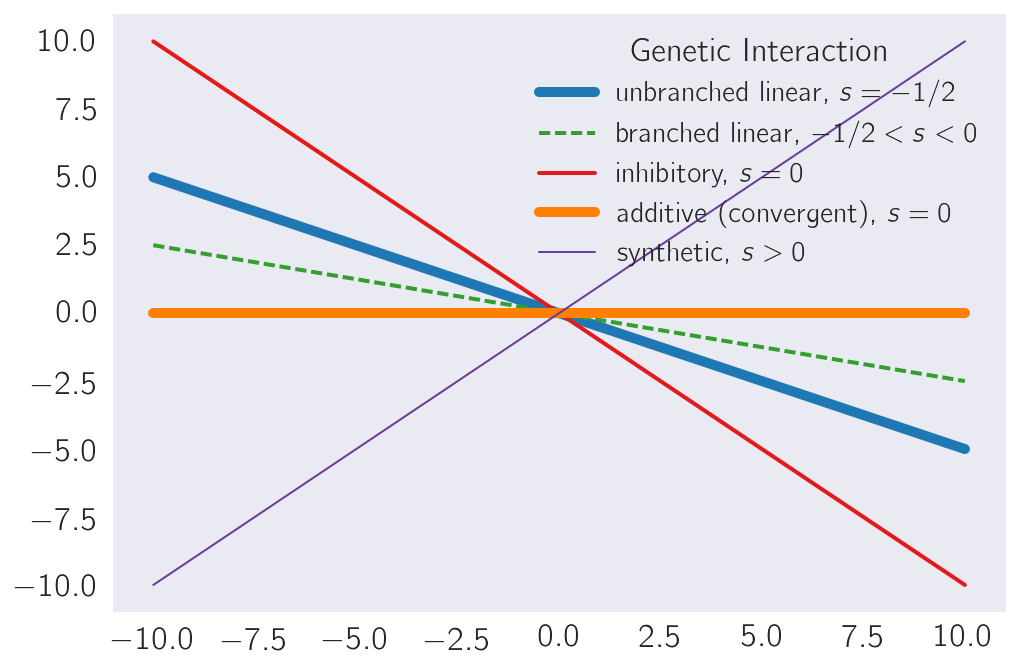

In [4]:
X = np.linspace(-10, 10)
Y = -1/2*X

plt.plot(X, -1/2*X, ls='-', color= '#1f78b4', lw=5, label='unbranched linear, $s=-1/2$')
plt.plot(X, -1/4*X, ls='--', color= '#33a02c', label='branched linear, $-1/2 < s < 0$')
plt.plot(X, -X, ls='-', lw=2, color= '#e31a1c', label='inhibitory, $s = 0$')
plt.plot(X, 0*X, 'k-', lw=5, color= '#ff7f00', label='additive (convergent), $s = 0$')
plt.plot(X, X, '-', lw=1,color= '#6a3d9a',  label='synthetic, $s > 0$')

lgd = plt.legend()
lgd.set_title('Genetic Interaction', prop=(mpl.font_manager.FontProperties(size=16)))
plt.savefig('../output/epistasis_plot_show.svg', bbox_inches='tight')

# Introduction to epistasis plots

Having worked out the theory, we can now make the epistasis plot given our data. Let's plot this for *egl-9* and *vhl-1*. 

## Egl-9 is epistatic to vhl-1

As a first step, I will define what genotypes I am working with. In this case, we want to work with the *egl-9*, *vhl-1* and *egl-9;vhl-1* genotypes.

In [5]:
letter1 = 'b'
letter2 = 'd'
double = genvar.double_mapping[letter1 + letter2]

The procedure to follow now is as follows:

1. Find the set of genes that are differentially expressed (direction agnostic) between the three genotytpes. Call that set $D$
2. For the set $D$, make a prediction of what the double mutant looks like by adding the single mutants (additive null model). Calculate the y-axis by taking the difference between the observed coefficient and the expected.
3. Calculate error bars&mdash;remember, variances add.
4. Find the line of best fit using Orthogonal Distance Regression with `scipy.odr`.
5. Plot.

I have implemented this procedure in the function `epi.epistasis_plot`, and I call it below. It returns a set of four things: 
 * x - a dataframe containing the identities, beta and q-values of the first letter that was passed to the function (in this case, the *egl-9* genes)
 * y - same, but for the second genotype (*vhl-1*)
 * xy - same, but for the double mutant
 * ax - the plot axis

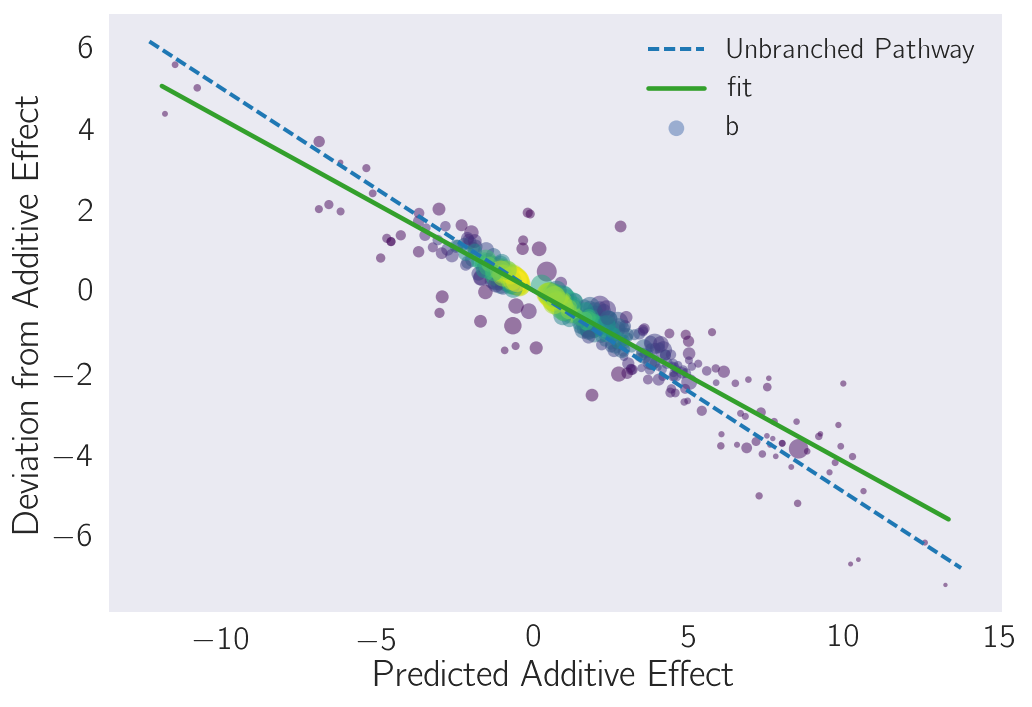

In [6]:
x, y, xy, ax = epi.make_epiplot([letter1, letter2], double, tidy_data)
plt.savefig('../output/epistasis{0}{1}.svg'.format(genvar.mapping[letter1], genvar.mapping[letter2]),
            bbox_inches='tight')

The points all fall along a line!!! Yes! We could even look at it in a little more detail, see how the scatter looks like if we zoom in.

In [ ]:
_ = epi.make_epiplot([letter1, letter2], double, tidy_data)
plt.xlim(-5, 5)
plt.ylim(-2.2, 2.2)

Let's figure out what the calculated slope of best fit is

In [ ]:
# calculate slope from the data:
actual = epi.ODR([x,y], xy, epistasis='actual')
actual.pprint()

Ok. It's a line, even though it does have scatter. Fortunately, the largest points are pretty close to the line. Now, what we need to do is perform all of the simulations for the epistasis possibilities. We will also bootstrap the observed distribution just to make sure the slope distribution is what we think it is. 

In [ ]:
s = epi.calculate_all_bootstraps(letter1, letter2, double, tidy_data, nsim=1000)

In [ ]:
ax = epi.plot_bootstraps(letter1, letter2, s, cumulative=False, shade=True)
plt.xlabel('Epistasis Coefficient')
plt.ylabel('Probability Density')
plt.savefig('../output/kde-epistasis{0}{1}.svg'.format(genvar.mapping[letter1], genvar.mapping[letter2]),
            bbox_inches='tight')

Alright! The predicted epistatic curve fits the data perfectly!! Woohoo!!! And the unbranched curve doesn't even overlap with the other ones. We could tentatively say that it looks like we are dealing with a branched pathway of some sort. In order to truly have any confidence in this result, we should have a different way to check. Let's implement a Bayesian Odds Ratio test and see whether we can choose a model this way. 

# Odds ratios

We will perform pairwise comparison between a free model with variable slope and the five theoretical models we tested. First, we need to define the Bayesian function we must optimize. It will be:

$$
P(D~|\alpha, M_1, I) = \prod_{(x_i, y_i, w_i) \in D} \exp{(\frac{(y_i - \alpha\cdot x_i)^2}{w_i})}\cdot (1+\beta^2)^{-3/2},
$$

where $(x_i, y_i)$ are the coordinates of the point $D_i$, and $w_i$ is the standard error of $y_i$. For the theoretic models, we will find the probability,

$$
P(D~|M_i, I) = \prod_{(x_i, y_i, w_i) \in D} \exp{(\frac{(y_i - y_{pred, i})^2}{w_i})},
$$

where $y_{pred, i}$ is the predicted y-value under model $i$. Finally, we will approximate the odds ratio by using a Laplace approximation of the functions where the probability is maximized. Briefly, model selection is performed by evaluating the quotient:

$$
O_{1i} = \frac{P(M_1~|I)}{P(M_i~|I}\frac{P(D~|M_1, I)}{P(D~|M_i, I)}
$$

The first term in the odds ratio is impossible to evaluate. We cannot know the probability of one model versus another. Qualitatively, we might say that certain models are more likely (for example, tried and true physical models are more likely than brand new recently invented models that come out of nowhere), but we cannot easily assign a number to them. Arbitratrily, we will assign the simpler models slight support, because genetics has been around for a long time. So, we will say the first term is equal to $\exp{-2}$ in favour of the theoretical models $M_j$. What is the second term?

Let's remember that the model we specified above is in terms of $P(D~|M_1, \alpha, I)$. We can get rid of $\alpha$ by marginalizing:

$$
P(D~|M_1) = \int \mathop{d\alpha} P(D~|\alpha, M_1, I).
$$

We can use a laplacian approximation on this integral to obtain:
$$
P(D~|M_1) \sim P(D~|\alpha^*, M_1, I)\cdot P(\alpha^*|M_1, I) \sqrt{2\pi}\sigma_1,
$$

where $\alpha^*$ is the *Maximum A Posteriori* (MAP) estimate of $\alpha$, and $\sigma_1$ is the covariance of the Gaussian approximation of the posterior around the point $\alpha^*$. Therefore, we can now calculate the approximate odds ratio:


$$
O_{1i} = \exp{(-2)}\frac{P(D~|\alpha^*, M_1, I)\cdot P(\alpha^*|M_1, I) \sqrt{2\pi}\sigma_1}{P(D~|M_i, I)}.
$$


Let's code all of this up!


## Writing the theoretical models

In [ ]:
# bayes model fitting:
def log_likelihood_fixed(w, x, y, model, alpha):
    """Likelihood probability for the theoretical models of epistasis"""
    sigma = w
    epistasis = ['actual', 'xy=x', 'xy=y', 'xy=x=y', 'xy=x+y',
                 'suppress']
    
    # errors:
    if model not in epistasis:
        raise ValueError('model is not allowed')
    
    # pick your model
    if model == 'xy=x+y':
        y_model = 0

    elif model == 'xy=x=y':
        y_model = -1/2*x

    elif model == 'suppress':
        y_model = -x

    elif (model == 'xy=x') or (model == 'xy=y'):
        y_model = alpha[model]*x
    
    # return the probability function
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior_fixed(w, x, y, model, alpha):
    """The posterior probability of the theoretical models"""
    return log_likelihood_fixed(w, x, y, model, alpha)

## Writing the free slope model

In [ ]:
def log_prior(theta):
    """Pareto prior, which makes the lines be evenly sampled between (-1,1) and plus\minus [1, infinity]."""
    return -1.5 * np.log(1 + theta ** 2)

def log_likelihood(theta, x, y, w):
    """Calculates the weighted chi-square for the free model"""
    sigma = w
    y_model = theta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x, y, w):
    """The complete logarithm of the posterior"""
    return log_prior(theta) + log_likelihood(theta, x, y, w)

def neg_log_prob_free(theta, x, y, w):
    """Negative log of the posterior for using scipy.optimize.minimize."""
    return -log_posterior(theta, x, y, w)

## Writing the Odds Ratio function

Procedure to follow:

1. Find the MAP for the probability function of the free model. It should agree closely but not exactly with the result from `scipy.ODR` because we are using a slightly different method.
2. Calculate the variance of the logarithm of the posterior as $(\mathop{dP}/\mathop{d\alpha})^-1$
3. Calculate $P(D~|M_i,I)$ for each theoretical model $M_i$
4. Calculate the Odds Ratio and print the results.

In [ ]:
def model_selection(X, Y, wdev, alpha, **kwargs):
    """
    Finds MAP for the free model, then does OR calculation for free model versus theoretical predictions.
    
    Params:
    -------
    X - The x-coordinates of the points to be used
    Y - y-coordinates
    wdev - the error in the y-coordinates
    alpha - slope for XY=X and XY=Y models. Must be a dictionary of the form {'XY=X': a number, 'XY=Y': a number}
    guess - starting guess for the MAP approximation (we will use the output from scipy.ODR)
    
    Outputs:
    Prints the OR for the models.
    """
    guess = kwargs.pop('guess', -0.5)
    
    # calculate probability of free model:
    res = scipy.optimize.minimize(neg_log_prob_free, guess, args=(X, Y, wdev), method='Powell')
    
    # Compute error bars
    second_derivative = scipy.misc.derivative(log_posterior, res.x, dx=1.0, n=2, args=(X, Y, wdev), order=3)
    cov_free = -1/second_derivative
    alpha_free = np.float64(res.x)
    log_free = log_posterior(alpha_free, X, Y, wdev)
    
    # log goodness of fit for fixed models    
    eps = ['xy=x', 'xy=y', 'xy=x=y', 'xy=x+y',
           'suppress']
    good_fits = {}
    
    for epistasis in eps:
        log_MAP = log_posterior_fixed(wdev, X, Y, model=epistasis, alpha=alpha)
        
        good_fits[epistasis] = log_free - log_MAP


        # occam factor - only the free model has a penalty
        if type(cov_free) is np.float64:
            log_occam_factor =(-np.log(2 * np.pi) + np.log(cov_free) 
                               - 0) / 2
        else:
            log_occam_factor =(-np.log(2 * np.pi) + np.log(np.linalg.det(cov_free)) 
                               - 0) / 2
        
        # give more standing to simpler models. but just a little bit!
        lg = log_free - log_MAP + log_occam_factor - 2
        print('{0} Odds Ratio: {1:2g}'.format(epistasis, np.exp(lg)))

    std = np.float64(np.sqrt(cov_free))
    print('the value used for the observed fit was {0:.3g} +/- {1:.3g}'.format(alpha_free, std))

## Odds ratio for the genome-wide epistasis measurements between *egl-9* and *vhl-1*

Now that we have written our odds ratio functions, we should test it. Now, one thing to bear in mind is that we have written the theoretical models in such a way that they are extremely conservative. This means that ANY systematic deviation from them will rapidly lead to their rejection in favor of the slightly more complex (but theoretically less pleasing) free-slope model. As a result, we need to be careful how we interpret the Odds ratio. Here are some guidelines:

 * Reject theoretical models when there is strong support for them. This means reject when $OR > 10^3$
 * When in need of an interpretation, selecting the model with the best support is also valid. Rejecting a model just means we need to keep in mind the epistasis is not exactly what we expected... but when push comes to shove we have to pick a conclusion. Select the conclusion with the most evidence, i.e., the lowest odds ratio.
 * Use your gut. If something isn't right, study it more. Let the data speak until you can resolve the controversy.

In [ ]:
alpha_eglvhl = {'xy=x': s['xy=x'].mean(), 
         'xy=y': s['xy=y'].mean()
        }

# Calculate X-coordinates
X = x.b.values + y.b.values
# Calculate Y-coordinates
Y = xy.b.values - X
# Calculate the corrected standard error for the Y-axis
wdev = np.sqrt(x.se_b**2 + y.se_b**2 + xy.se_b**2)
# do the model selection
model_selection(X, Y, wdev, alpha=alpha_eglvhl, guess=actual.beta[0])

Wow. We can see that all of the models are basically rejected in favor of the free-slope model. Except one. We fail to reject the model $XY=X$. In this case, $X$ is *egl-9*, and $Y$ is *vhl-1*. This means that the parameter-free prediction that *egl-9* is epistatic over *vhl-1* is a preferred model over the free-slope model. Genetics. Works.

# Measuring suppressive epistasis

## hif-1 suppresses egl-9

This is self explanatory, but let's repeat the analysis above for *egl-9* and *hif-1*.

In [ ]:
letter1 = 'b'
letter2 = 'c'
double = genvar.double_mapping[letter1 + letter2]
x, y, xy, ax = epi.epistasis_plot([letter1, letter2], double, tidy_data)
plt.savefig('../output/epistasis{0}{1}.svg'.format(genvar.mapping[letter1], genvar.mapping[letter2]),
            bbox_inches='tight')

We can immediately notice a couple of things. First, there are a LOT less points here (around 50) as opposed to the previous plot (around 330). Secondly, they form a line that has a slope $<-\frac{1}{2}$. Both of these are characteristic of a gene that is under strong suppression. Let's see what our models will predict when we simulate them.

In [ ]:
s = epi.calculate_all_bootstraps(letter1, letter2, double, tidy_data, nsim=5000)

In [ ]:
ax = epi.plot_bootstraps(letter1, letter2, s, cumulative=False, shade=True)
plt.xlabel('Epistasis Coefficient')
plt.ylabel('Probability Density')
plt.savefig('../output/kde-epistasis{0}{1}.svg'.format(genvar.mapping[letter1], genvar.mapping[letter2]),
            bbox_inches='tight')

We notice a couple of things from this graph. First, all of the predictions are considerably wider. This is the result of the considerably smaller number of points in this dataset. The observed fit distribution overlaps significantly with a model where *hif-1* is epistatic over *egl-9* (black curve), but also with the model of complete suppression. Let's take a look at the OR before we can decide what's going on.

In [ ]:
alpha_eglhif = {'xy=x': s['xy=x'].mean(), 
                'xy=y': s['xy=y'].mean()
                }

actual = epi.ODR([x,y], xy, epistasis='actual')
X = x.b.values + y.b.values
Y = xy.b.values - X
wdev = np.sqrt(x.se_b**2 + y.se_b**2 + xy.se_b**2)
model_selection(X, Y, wdev, alpha=alpha_eglhif, guess=actual.beta[0])

In this case, we reject all of the models. If we really wanted to select a model, we would say that $XY=Y$ is the one that maximizes the probability of observing the data. The second most likely model is the complete suppression model. Well, this matches intuition. In this case, I am not offended by our inability to select an OR. We had very few data points. 

# Transitivity in transcriptomes

In theory, if two genes are acting through a linear pathway, then both genes should have identical transcriptomes. If they are truly equal, we should be able to substitute one transcriptome for another for any computation we are performing. It follows that we should be able to substitute transcriptomes to predict and/or measure epistasis between two genes if we have a third gene that is related via a linear pathway.

## Predicting the epistasis between *egl-9* and *vhl-1* using the *rhy-1* transcriptome

Recall that *rhy-1* genetically activates *egl-9*. If transcriptomes are transitive, then we could use the *rhy-1* transcriptome to predict the epistasis coefficient between *egl-9* and *vhl-1*. We could also use it to "measure" the transcriptome-wide coefficient by substituting *rhy-1* instead of the *egl-9* mutant.

In [ ]:
letter1 = 'e'
letter2 = 'd'
double = genvar.double_mapping['b' + letter2]
x, y, xy, ax = epi.epistasis_plot([letter1, letter2], double, tidy_data)

In [ ]:
s = epi.calculate_all_bootstraps(letter1, letter2, double, tidy_data, nsim=5000)

In [ ]:
ax = epi.plot_bootstraps(letter1, letter2, s, cumulative=False, shade=True)
plt.xlabel('Epistasis Coefficient')
plt.ylabel('Cumulative Density Function')
plt.savefig('../output/kde-epistasis{0}{1}.svg'.format(genvar.mapping[letter1], genvar.mapping[letter2]),
            bbox_inches='tight')

In [ ]:
alpha = {'xy=x': s['xy=x'].mean(), 
         'xy=y': s['xy=y'].mean()
        }

actual = epi.ODR([x,y], xy, epistasis='actual')
print('The observed slope from the ODR regression was {0:.2g}'.format(actual.beta[0]))
X = x.b.values + y.b.values
Y = xy.b.values - X
wdev = np.sqrt(x.se_b**2 + y.se_b**2 + xy.se_b**2)
model_selection(X, Y, wdev, alpha=alpha, guess=actual.beta[0])

If we use ODR to predict the epistasis coefficient, we would "measure" an epistasis value of -0.42, which is the same number we obtained with the *egl-9* mutant.

However, unlike with the *egl-9* mutant data, the odds ratio test fails to accept any theoretical model. Clearly, there are deviations that occur between *rhy-1* and *egl-9*. Maybe knocking out *rhy-1* does not fully inactivate *egl-9*. Indeed, this is a good hypothesis. We see that the epistasis models, $XY=X$ and $XY=Y$, both begin to overlap with the unbranched model. This could suggest that knocking out *rhy-1* inhibits the VHL-1-dependent inhibition of HIF-1 by EGL-9, but not the remaining inhibition.

## Predicting the epistasis between *egl-9* and *hif-1* using the *rhy-1* transcriptome

In [ ]:
letter1 = 'e'
letter2 = 'c'
double = genvar.double_mapping['b' + letter2]
x, y, xy, ax = epi.epistasis_plot([letter1, letter2], double, tidy_data)

In [ ]:
s = epi.calculate_all_bootstraps(letter1, letter2, double, tidy_data, nsim=5000)

In [ ]:
ax = epi.plot_bootstraps(letter1, letter2, s, cumulative=False, shade=True)
plt.xlabel('Epistasis Coefficient')
plt.ylabel('Cumulative Density Function')
plt.savefig('../output/kde-epistasis{0}{1}.svg'.format(genvar.mapping[letter1], genvar.mapping[letter2]),
            bbox_inches='tight')

In [ ]:
alpha = {'xy=x': s['xy=x'].mean(), 
         'xy=y': s['xy=y'].mean()
        }

actual = epi.ODR([x,y], xy, epistasis='actual')
X = x.b.values + y.b.values
Y = xy.b.values - X
wdev = np.sqrt(x.se_b**2 + y.se_b**2 + xy.se_b**2)
model_selection(X, Y, wdev, alpha=alpha, guess=actual.beta[0])

Beta: [-0.43226404]
Beta Std Error: [ 0.00558734]
Beta Covariance: [[  8.04050001e-05]]
Residual Variance: 0.3882642343518116
Inverse Condition #: 1.0000000000000002
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-0.58461077]
Beta Std Error: [ 0.00559437]
Beta Covariance: [[  9.44573940e-05]]
Residual Variance: 0.3313345691017018
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


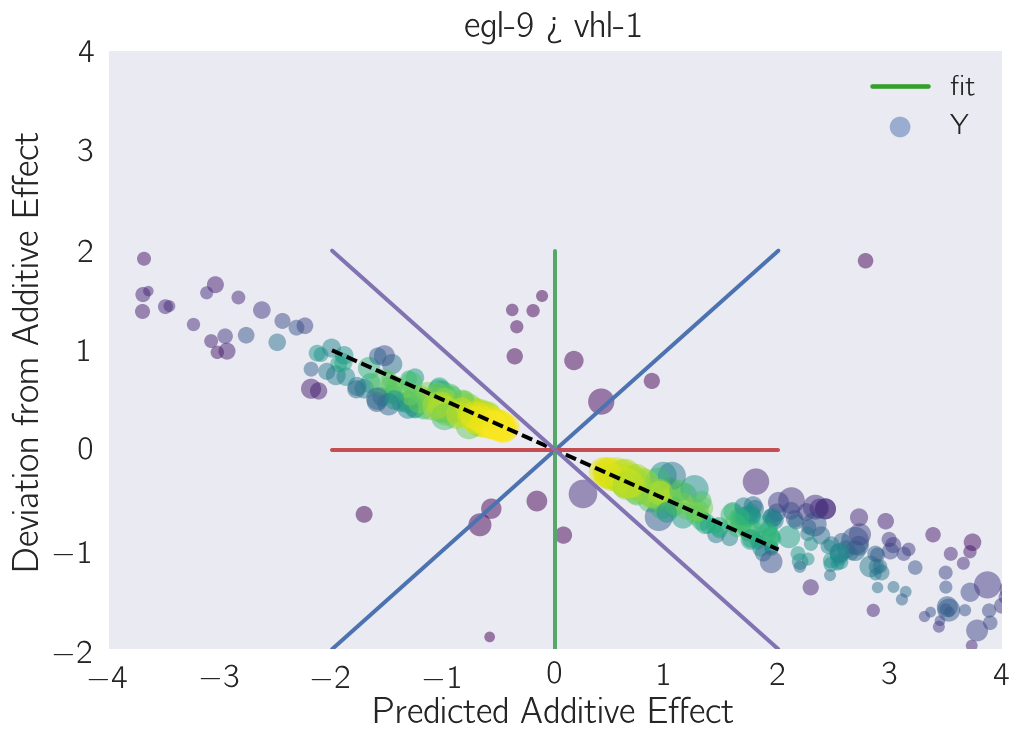

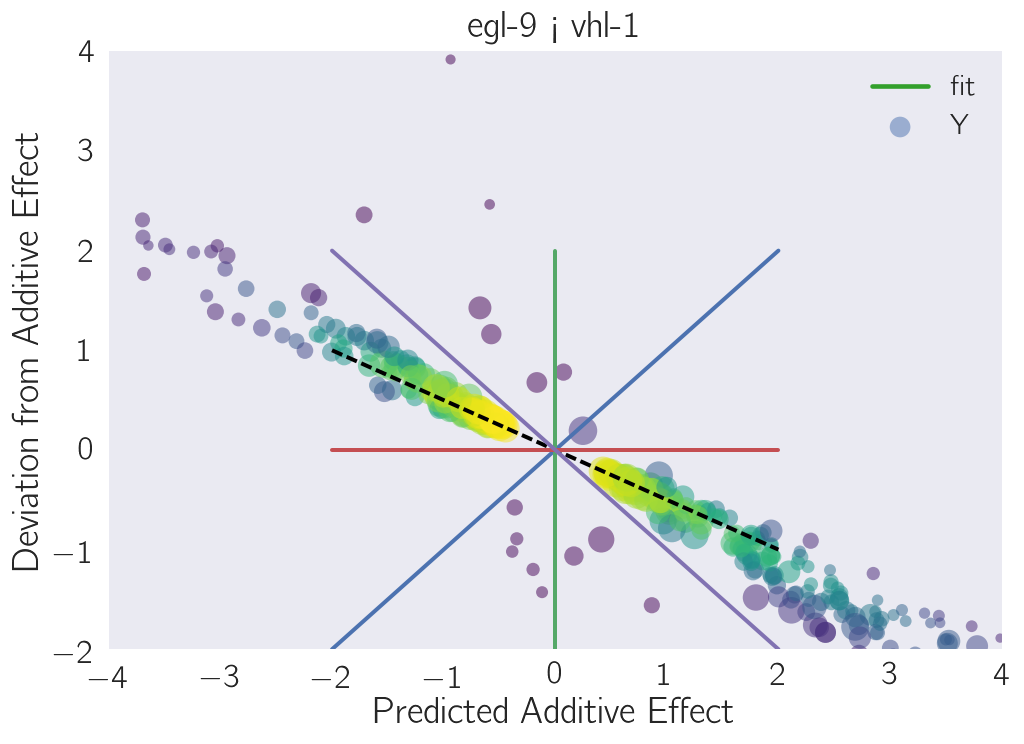

In [46]:
def predict_epistasis_from_blank(letters, df=tidy_data, model='xy=x', condition=None):
    common = epi.find_overlap(letters, df)
    x = df[(df.code == letters[0]) & (df.target_id.isin(common))].copy()
    y = df[(df.code == letters[1]) & (df.target_id.isin(common))]

    X = x.b + y.b


    if model == 'xy=x':
        Y = -y.b
        Y_se = y.se_b
    else:
        Y = -x.b
        Y_se = x.se_b

    x['X'] = X
    x['Y'] = Y

        
    epi.epiplot(x.X, x.Y, Y_se, alpha=0.3)

    plt.ylim(-2, 4)
    plt.xlim(-4, 4)
    plt.plot([-2, 2], [1, -1], 'k--')
    plt.plot([-2, 2], [-2,2])
    plt.plot([0, 0], [-2,2])
    plt.plot([-2, 2], [0, 0])
    plt.plot([-2, 2], [2, -2])
    
    actual = epi.ODR([x,y], y, epistasis=model)
    actual.pprint()

letters = ['b', 'd']
predict_epistasis_from_blank(letters)
plt.title('egl-9 > vhl-1')

predict_epistasis_from_blank(letters, model='xy=y')
plt.title('egl-9 < vhl-1')


Beta: [-0.46888572]
Beta Std Error: [ 0.00692078]
Beta Covariance: [[ 0.00010955]]
Residual Variance: 0.43721028173523574
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-0.55518569]
Beta Std Error: [ 0.00692769]
Beta Covariance: [[ 0.00012012]]
Residual Variance: 0.3995533945332432
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


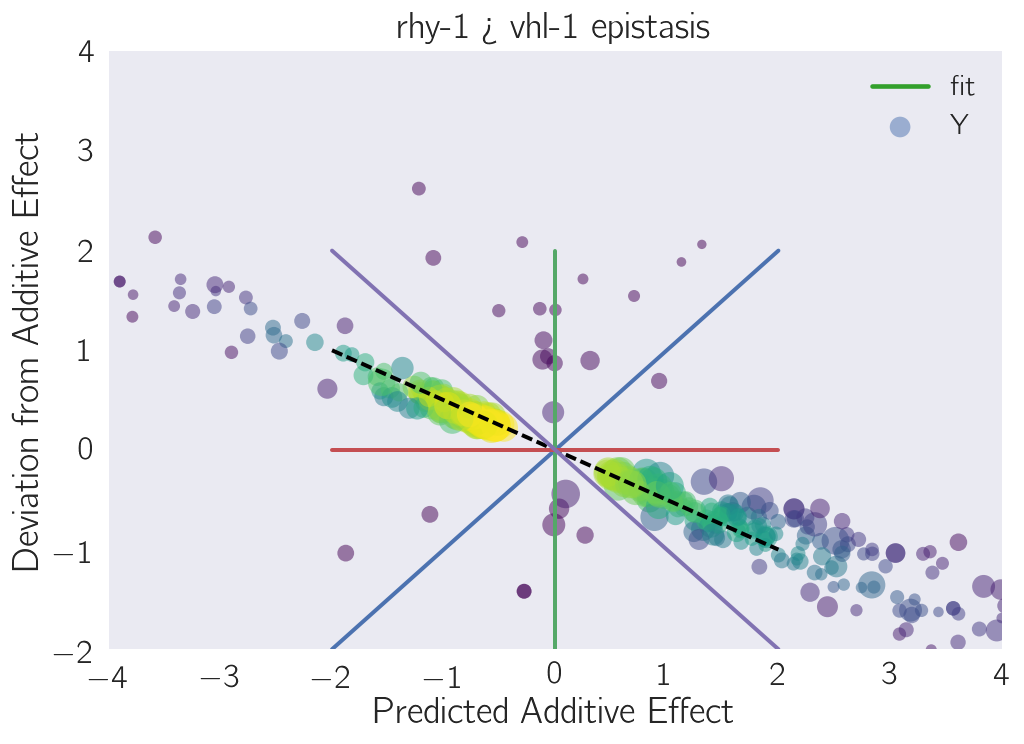

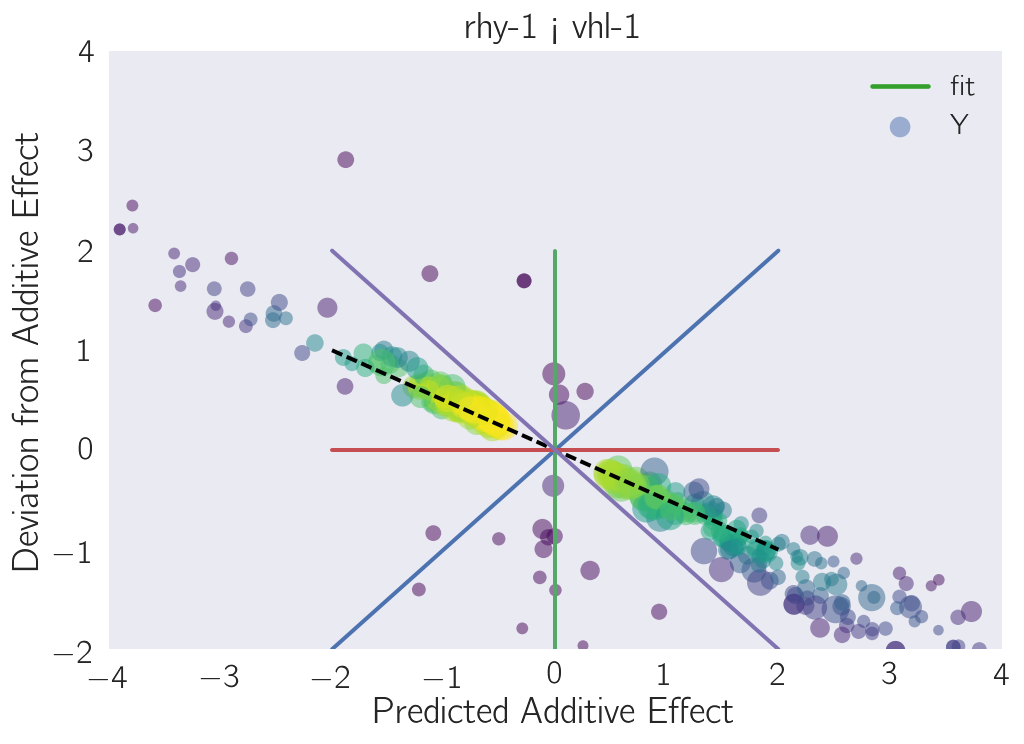

In [39]:
letters = ['e', 'd']
predict_epistasis_from_blank(letters)
plt.title('rhy-1 > vhl-1 epistasis')

predict_epistasis_from_blank(letters, model='xy=y')
plt.title('rhy-1 < vhl-1')


Beta: [-0.52793781]
Beta Std Error: [ 0.00176082]
Beta Covariance: [[  3.58571626e-05]]
Residual Variance: 0.08646799160761096
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-0.47629049]
Beta Std Error: [ 0.00176063]
Beta Covariance: [[  3.39669860e-05]]
Residual Variance: 0.09125994509452975
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


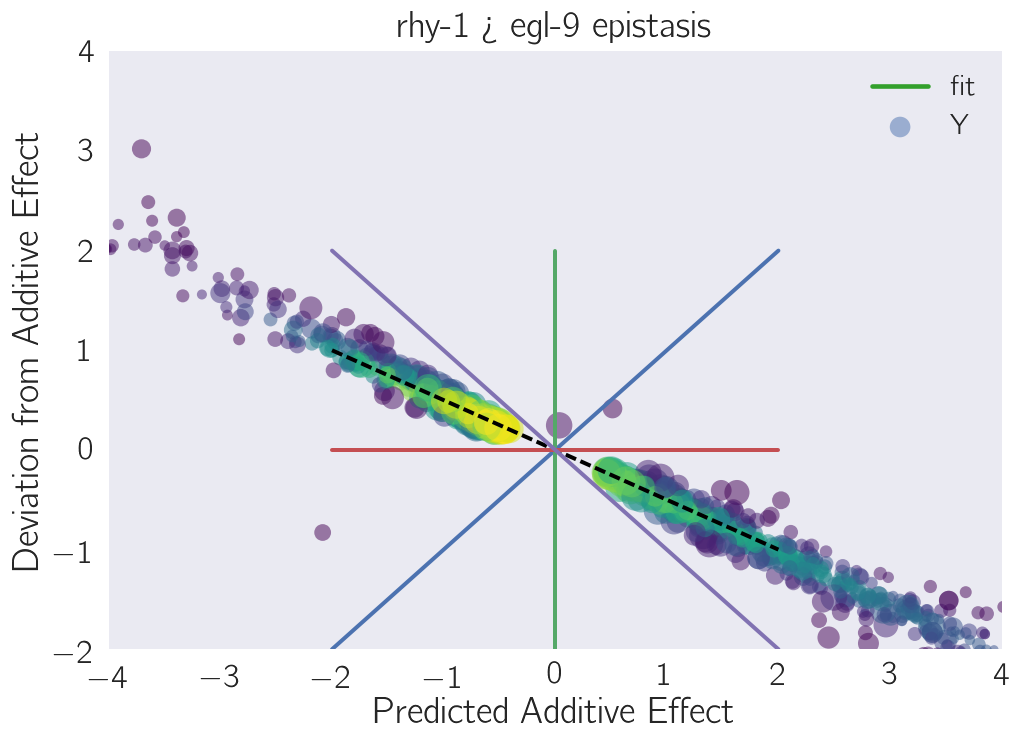

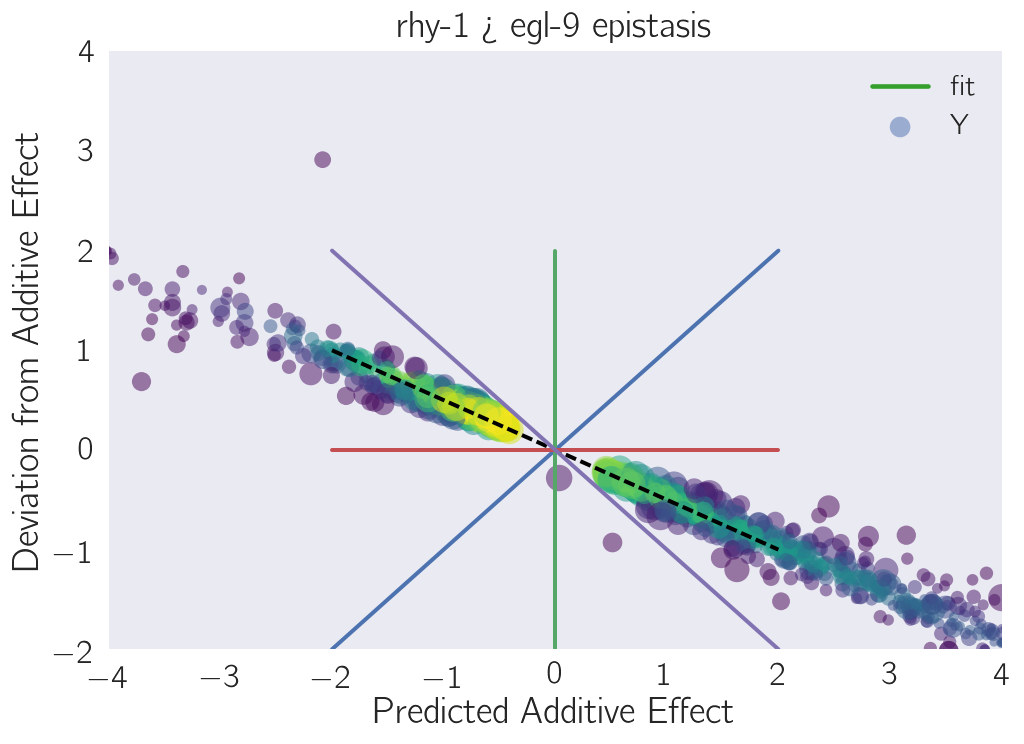

In [41]:
letters = ['e', 'b']
predict_epistasis_from_blank(letters)
plt.title('rhy-1 > egl-9 epistasis')

predict_epistasis_from_blank(letters, model='xy=y')
plt.title('rhy-1 < egl-9 epistasis')

Beta: [-0.42817418]
Beta Std Error: [ 0.0186018]
Beta Covariance: [[ 0.00037367]]
Residual Variance: 0.9260101710786164
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-0.64358381]
Beta Std Error: [ 0.01873151]
Beta Covariance: [[ 0.00047384]]
Residual Variance: 0.7404806932902683
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


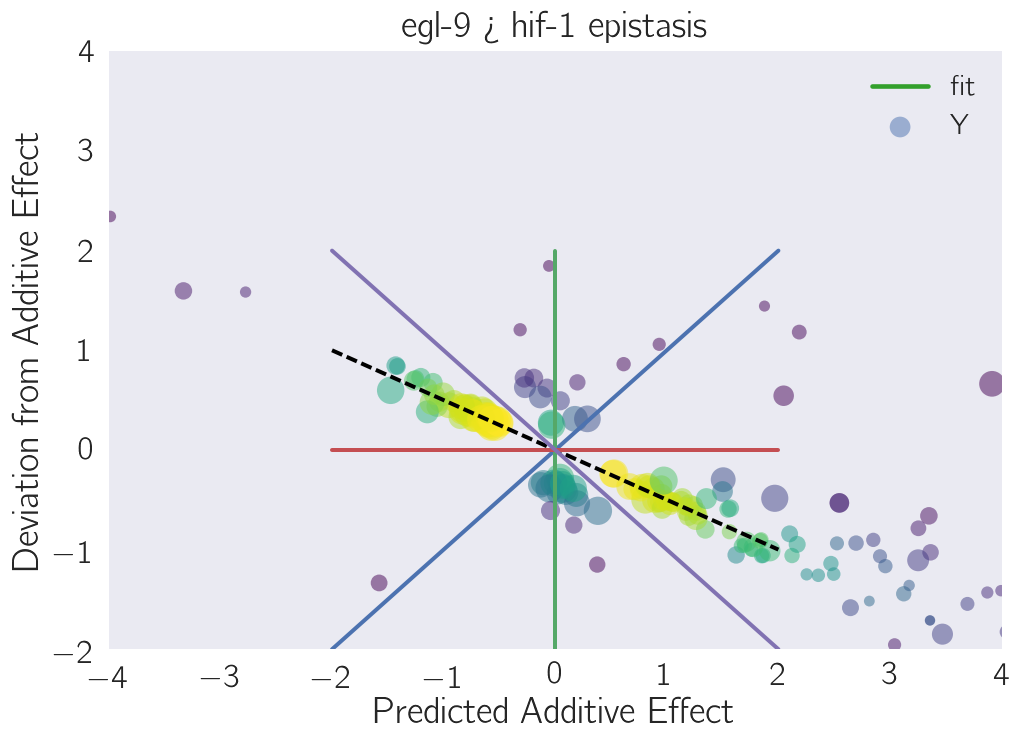

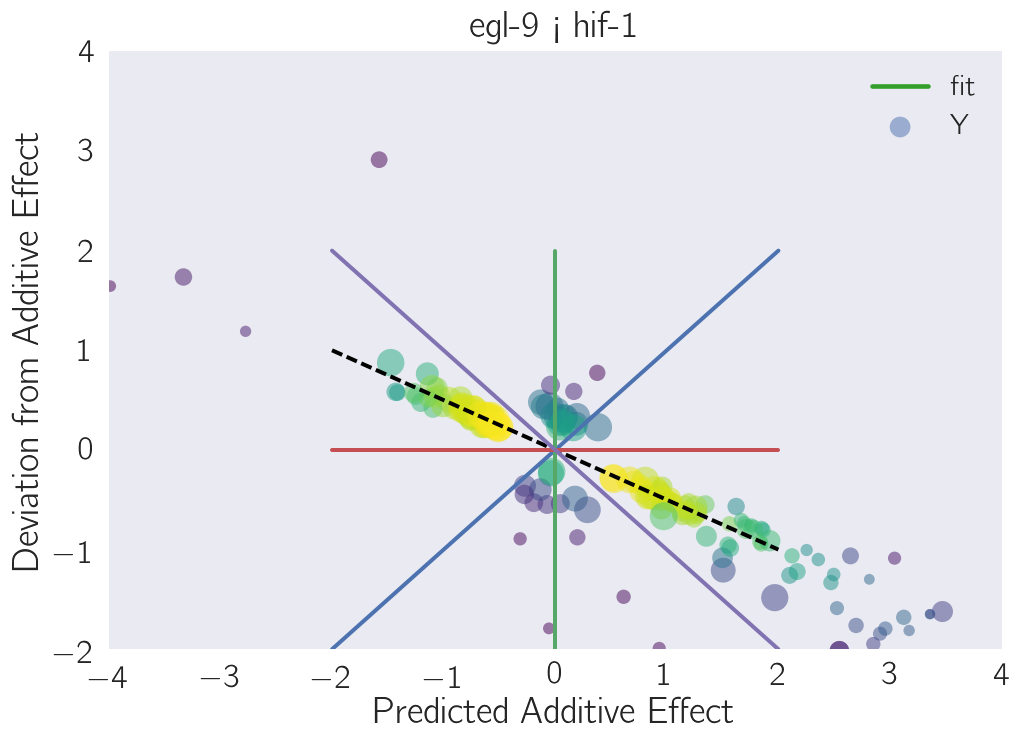

In [48]:
letters = ['e', 'c']
predict_epistasis_from_blank(letters)
plt.title('egl-9 > hif-1 epistasis')

predict_epistasis_from_blank(letters, model='xy=y')
plt.title('egl-9 < hif-1')


Beta: [-0.75445799]
Beta Std Error: [ 0.02731885]
Beta Covariance: [[ 0.00040533]]
Residual Variance: 1.841273829732904
Inverse Condition #: 1.0000000000000002
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-0.62455715]
Beta Std Error: [ 0.02702994]
Beta Covariance: [[ 0.00034475]]
Residual Variance: 2.119244839425356
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


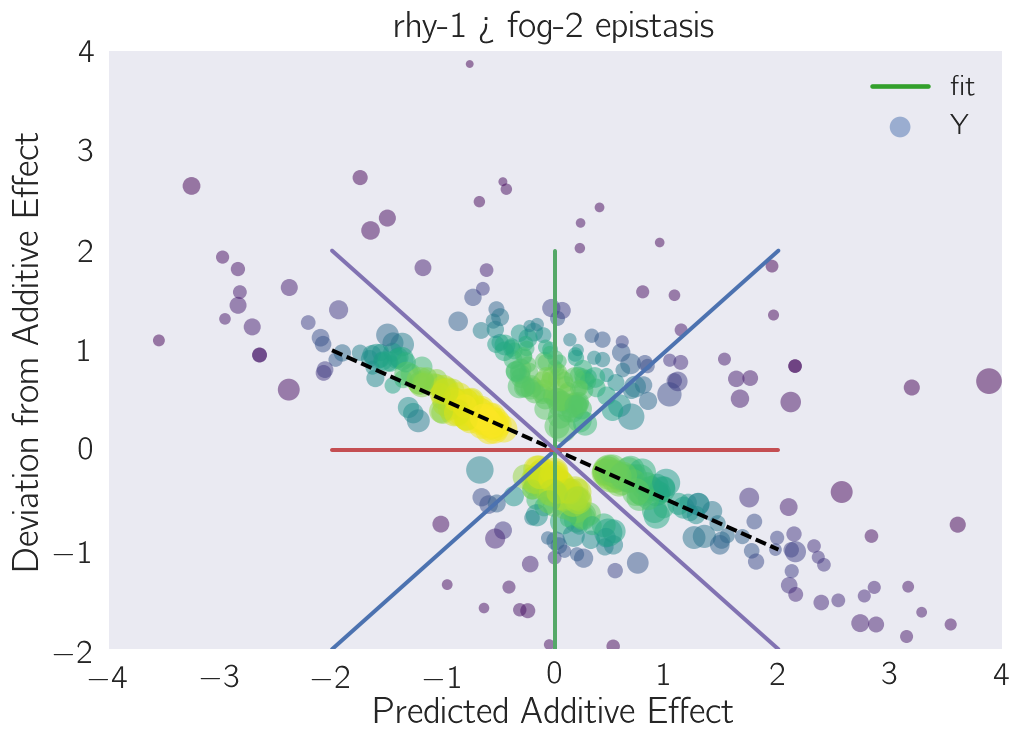

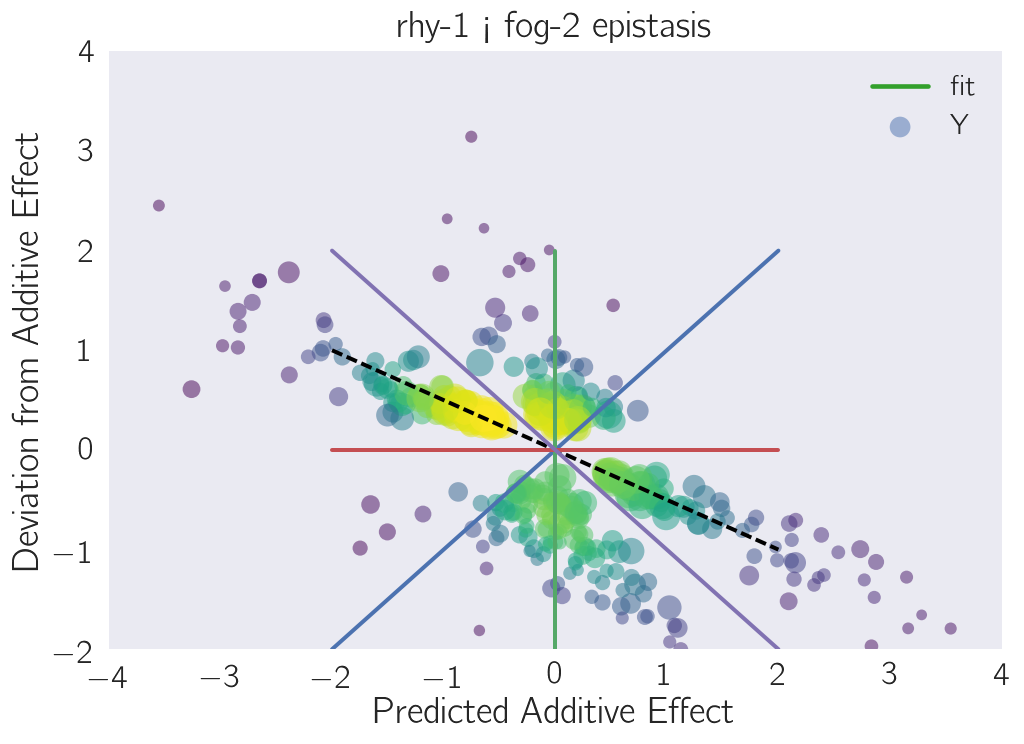

In [49]:
letters = ['e', 'g']
predict_epistasis_from_blank(letters)
plt.title('rhy-1 > fog-2 epistasis')

predict_epistasis_from_blank(letters, model='xy=y')
plt.title('rhy-1 < fog-2 epistasis')

Beta: [-1.0331774]
Beta Std Error: [ 0.09417889]
Beta Covariance: [[ 0.00685898]]
Residual Variance: 1.2931461753571973
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-1.02249464]
Beta Std Error: [ 0.09448736]
Beta Covariance: [[ 0.00679629]]
Residual Variance: 1.313637920295053
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


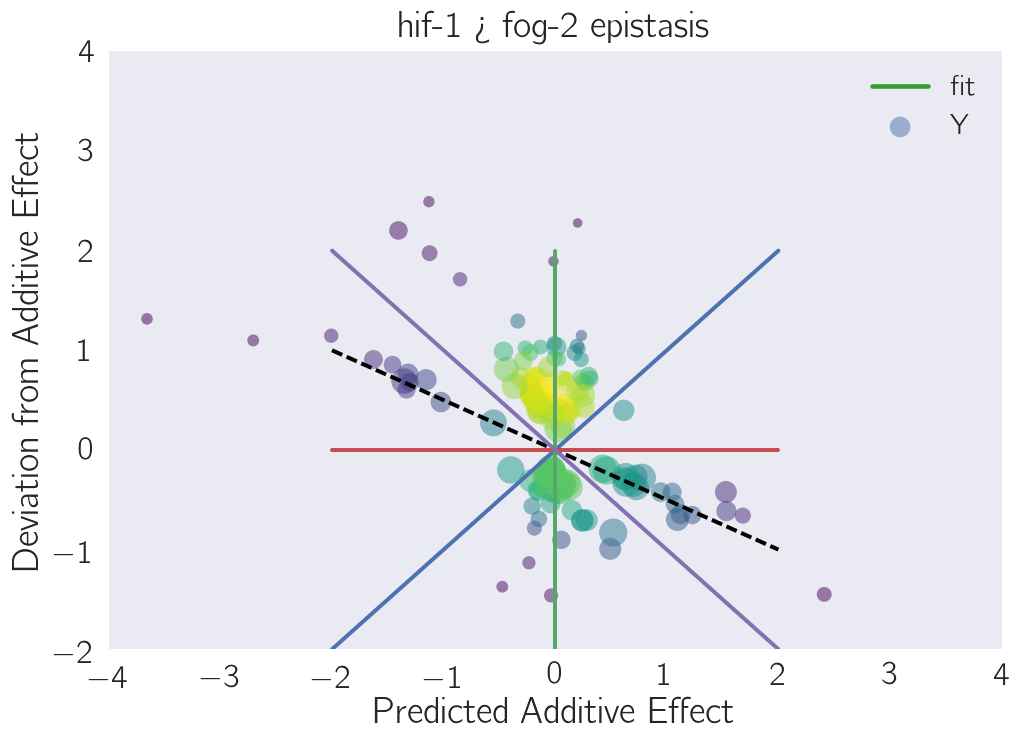

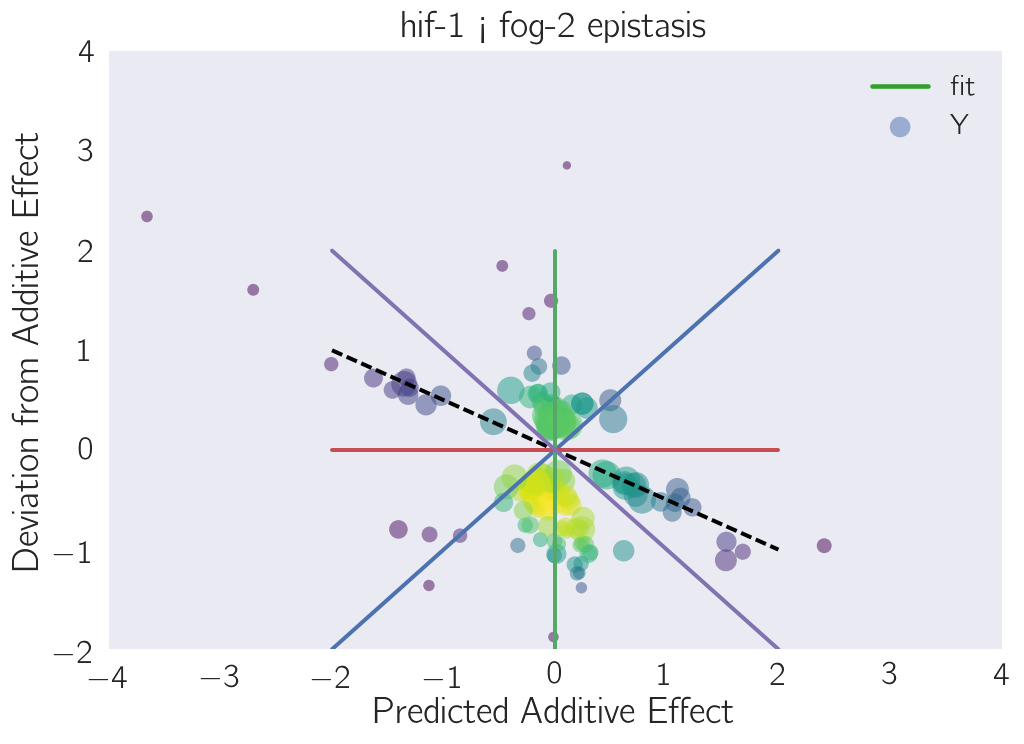

In [50]:
letters = ['c', 'g']
predict_epistasis_from_blank(letters)
plt.title('hif-1 > fog-2 epistasis')

predict_epistasis_from_blank(letters, model='xy=y')
plt.title('hif-1 < fog-2 epistasis')